Author: Prakrut Kansara

Description: This code reads in GPM IMERG data and plots a simple time series and spatial map of the region of interest.

Date created: 1st September, 2021

In [1]:
import xarray as xr ## For working with NetCDF files

import salem ## For cropping NetCDF files to region of interest

import datetime

import pandas as pd

c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [5]:
gpm = xr.open_mfdataset('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/IMERG data/*.nc4',parallel=True)

In [8]:
gpm['time'] = pd.to_datetime(gpm.indexes['time'])


In [9]:
gpm

<xarray.Dataset>
Dimensions:                         (time: 166, lon: 260, lat: 230)
Coordinates:
  * time                            (time) datetime64[ns] 2000-06-01 ... 2014...
  * lon                             (lon) float32 -67.95 -67.85 ... -42.05
  * lat                             (lat) float32 -35.95 -35.85 ... -13.05
Data variables:
    precipitation                   (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    randomError                     (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    gaugeRelativeWeighting          (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
    precipitationQualityIndex       (time, lon, lat) float32 dask.array<chunksize=(1, 260, 230), meta=np.ndarray>
Attributes:
    CDI:                                    Climate Data Interface version 1....
    Conventions:                            CF-1.6
    Original_Producer_Metadata_FileHeader:  DOI=10.5067/GPM/IMERG/3B-MONTH/06...
    Original_Producer_Metadata_FileInfo:    DataFormatVersion=6a;\nTKCodeBuil...
    Original_Producer_Metadata_GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegis...
    InputPointer:                           3B-MO.MS.MRG.3IMERG.20000601-S000...
    history_L34RS:                          'Created by L34RS v1.4.2 @ NASA G...
    CDO:                                    Climate Data Operators version 1....

In [10]:
# gpm_datetimeindex = gpm.indexes['time'].to_datetimeindex()
# gpm['time'] = gpm_datetimeindex

NameError: name 'df' is not defined

In [4]:
shapefile_path = r'C:\Users\Jessica Besnier\Documents\Fall 2021\AGU data\river_basin_shape-file'
filename = ['la_plata']

## Precipitation conversion factor
p_factor = 24*30 # (Since my data files are in daily format and IMERG provides data in the form of mm/hr)

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    p = gpm.precipitation.salem.roi(shape=shdf)*p_factor

    p_lat = p.dropna(dim='lat',how='all')
    p_lon = p_lat.dropna(dim='lon',how='all')

    return p_lon

la_plata_imerg = extract_values(0)

ValueError: operands could not be broadcast together with shapes (230, 260) (166, 260, 230) ()

In [16]:
la_plata_imerg

<xarray.DataArray 'precipitation' (time: 242, lon: 234, lat: 216)>
dask.array<getitem, shape=(242, 234, 216), dtype=float32, chunksize=(1, 234, 216), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2001-01-01 ... 2021-04-01
  * lon      (lon) float32 -66.95 -66.85 -66.75 -66.65 ... -43.85 -43.75 -43.65
  * lat      (lat) float32 -35.65 -35.55 -35.45 -35.35 ... -14.35 -14.25 -14.15

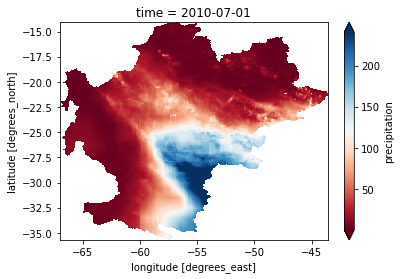

In [4]:
## Make spatial plot
date = '2010-07-01' #showing for the whole month of July- in mm/month
la_plata_imerg.sel(time=date).plot.imshow(x='lon',y='lat',cmap='RdBu',robust=True)

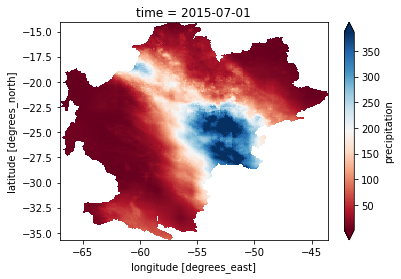

In [5]:
## Make spatial plot
date = '2015-07-01' #showing for the whole month of July- in mm/month
la_plata_imerg.sel(time=date).plot.imshow(x='lon',y='lat',cmap='RdBu',robust=True)

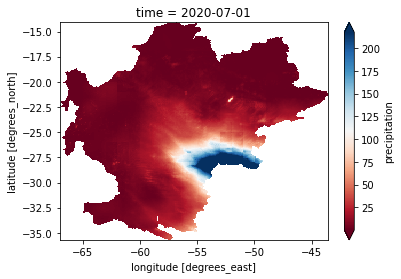

In [7]:
## Make spatial plot
date = '2020-07-01' #showing for the whole month of July- in mm/month
la_plata_imerg.sel(time=date).plot.imshow(x='lon',y='lat',cmap='RdBu',robust=True)

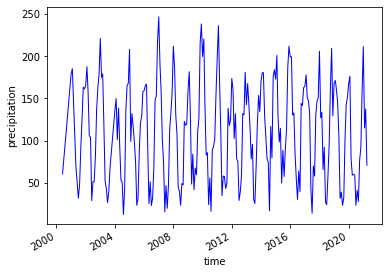

In [28]:
## Time series for entire region
la_plata_imerg.mean(['lat','lon']).plot(color='blue',linewidth=1)